<a href="https://colab.research.google.com/github/Tessellate-Imaging/monk_v1/blob/master/study_roadmaps/2_transfer_learning_roadmap/5_exploring_model_families/4_resnet/9)%20Comparing%20resnet%20v1%20and%20v2%20variants%20-%20keras%20backend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goals



### Train a blood cell type classifier using resnet v1 and v2 variants

### Understand what all differences happen when switching between resnets variants 

### Understand bigger and deeper network not always means better results

#### For this experiment you will be using mxnet backend

# What is resnet

## Readings on resnet

  1) Points from https://towardsdatascience.com/an-overview-of-resnet-and-its-variants-5281e2f56035
    - The core idea of ResNet is introducing a so-called “identity shortcut connection” that skips one or more layers
    - The deeper model should not produce a training error higher than its shallower counterparts.
    - solves the problem of vanishing gradiens as network depth increased - https://medium.com/@anishsingh20/the-vanishing-gradient-problem-48ae7f501257
    
    
 
  2) Points from https://medium.com/@14prakash/understanding-and-implementing-architectures-of-resnet-and-resnext-for-state-of-the-art-image-cf51669e1624
    - Won 1st place in the ILSVRC 2015 classification competition with top-5 error rate of 3.57% (An ensemble model)
    - Efficiently trained networks with 100 layers and 1000 layers also.
    - Replacing VGG-16 layers in Faster R-CNN with ResNet-101. They observed a relative improvements of 28%
    

  3) Read more here
    - https://arxiv.org/abs/1512.03385
    - https://d2l.ai/chapter_convolutional-modern/resnet.html
    - https://cv-tricks.com/keras/understand-implement-resnets/
    - https://mc.ai/resnet-architecture-explained/




# Table of Contents


## [Install](#0)


## [Train experiment with resnet-50-v1 architecture and validate](#1)


## [Train experiment with resnet-50-v2 architecture and validate](#2)


## [Compare all the experiments](#3)

<a id='0'></a>
# Install Monk

## Using pip (Recommended)

  - colab (gpu) 
      - All bakcends: `pip install -U monk-colab`
      

  - kaggle (gpu) 
      - All backends: `pip install -U monk-kaggle`
      

  - cuda 10.2	
      - All backends: `pip install -U monk-cuda102`
      - Gluon bakcned: `pip install -U monk-gluon-cuda102`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda102`
      - Keras backend: `pip install -U monk-keras-cuda102`
      

  - cuda 10.1	
      - All backend: `pip install -U monk-cuda101`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda101`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda101`
	  - Keras backend: `pip install -U monk-keras-cuda101`
      

  - cuda 10.0	
      - All backend: `pip install -U monk-cuda100`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda100`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda100`
	  - Keras backend: `pip install -U monk-keras-cuda100`
      

  - cuda 9.2	
      - All backend: `pip install -U monk-cuda92`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda92`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda92`
	  - Keras backend: `pip install -U monk-keras-cuda92`
      

  - cuda 9.0	
      - All backend: `pip install -U monk-cuda90`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda90`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda90`
	  - Keras backend: `pip install -U monk-keras-cuda90`
      

  - cpu 		
      - All backend: `pip install -U monk-cpu`
	  - Gluon bakcned: `pip install -U monk-gluon-cpu`
	  - Pytorch backend: `pip install -U monk-pytorch-cpu`
	  - Keras backend: `pip install -U monk-keras-cpu`

## Install Monk Manually (Not recommended)
 
### Step 1: Clone the library
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 
 
 
### Step 2: Install requirements 
 - Linux
     - Cuda 9.0
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu90.txt`
     - Cuda 9.2
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu92.txt`
     - Cuda 10.0
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu100.txt`
     - Cuda 10.1
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu101.txt`
     - Cuda 10.2
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu102.txt`
     - CPU (Non gpu system)
         - `cd monk_v1/installation/Linux && pip install -r requirements_cpu.txt`
 
 
  - Windows
     - Cuda 9.0 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu90.txt`
     - Cuda 9.2 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu92.txt`
     - Cuda 10.0 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu100.txt`
     - Cuda 10.1 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu101.txt`
     - Cuda 10.2 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu102.txt`
     - CPU (Non gpu system)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cpu.txt`
         
         
  - Mac
     - CPU (Non gpu system)
         - `cd monk_v1/installation/Mac && pip install -r requirements_cpu.txt`
         
         
  - Misc
      - Colab (GPU)
          - `cd monk_v1/installation/Misc && pip install -r requirements_colab.txt`
      - Kaggle (GPU)
          - `cd monk_v1/installation/Misc && pip install -r requirements_kaggle.txt`
 
 
 
### Step 3: Add to system path (Required for every terminal or kernel run)
 - `import sys`
 - `sys.path.append("monk_v1/");`

## Dataset - Chest X-ray Pneumonia Dataset
    - https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1myx6OZ3l4spNvGrYFgwgeYXX6ebyjLBY' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1myx6OZ3l4spNvGrYFgwgeYXX6ebyjLBY" -O chest-xray-pneumonia.zip && rm -rf /tmp/cookies.txt

In [2]:
! unzip -qq chest-xray-pneumonia.zip

# Imports

In [1]:
#Using mxnet-gluon backend 

# When installed using pip
from monk.gluon_prototype import prototype


# When installed manually (Uncomment the following)
#import os
#import sys
#sys.path.append("monk_v1/");
#sys.path.append("monk_v1/monk/");
#from monk.gluon_prototype import prototype

<a id='1'></a>
# Train experiment with resnet-50-v1 architecture and validate

In [3]:
# Load experiment

gtf = prototype(verbose=1);
gtf.Prototype("Compare-resnet-v1-v2", "resnet50-v1");


# Insert data and set params in default mode
gtf.Default(dataset_path="chest-xray-pneumonia/train", 
            model_name="resnet50", 
            freeze_base_network=False,
            num_epochs=5);


Keras Version: 2.2.5
Tensorflow Version: 1.12.0

Experiment Details
    Project: Compare-resnet-v1-v2
    Experiment: resnet50-v1
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/2_transfer_learning_roadmap/5_exploring_model_families/3_resnet/workspace/Compare-resnet-v1-v2/resnet50-v1/

Dataset Details
    Train path:     chest-xray-pneumonia/train
    Val path:       None
    CSV train path: None
    CSV val path:  None

Dataset Params
    Input Size:  224
    Batch Size:  4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Found 3652 images belonging to 2 classes.
Found 1564 images belonging to 2 classes.
Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Dataset Numbers
    Num train images: 3652
    Num val image

In [4]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed


Training Start
Epoch 1/5
913/913 [==============================] - 127s 139ms/step - loss: 0.2478 - acc: 0.8995 - val_loss: 0.0871 - val_acc: 0.9744

Epoch 00001: saving model to workspace/Compare-resnet-v1-v2/resnet50-v1/output/models/resume_state.h5

Epoch 00001: val_loss improved from inf to 0.08714, saving model to workspace/Compare-resnet-v1-v2/resnet50-v1/output/models/best_model.h5

Epoch 00001: saving model to workspace/Compare-resnet-v1-v2/resnet50-v1/output/models/intermediate_model_01.h5
Epoch 2/5
913/913 [==============================] - 116s 127ms/step - loss: 0.1448 - acc: 0.9482 - val_loss: 0.0662 - val_acc: 0.9776

Epoch 00002: saving model to workspace/Compare-resnet-v1-v2/resnet50-v1/output/models/resume_state.h5

Epoch 00002: val_loss improved from 0.08714 to 0.06623, saving model to workspace/Compare-resnet-v1-v2/resnet50-v1/output/models/best_model.h5

Epoch 00002: saving model to workspace/Compare-resnet-v1-v2/resnet50-v1/output/models/intermediate_model_02.h5
E

<Figure size 432x288 with 0 Axes>

In [5]:
# Load for validation

gtf = prototype(verbose=1);
gtf.Prototype("Compare-resnet-v1-v2", "resnet50-v1", eval_infer=True);


# Set dataset
gtf.Dataset_Params(dataset_path="chest-xray-pneumonia/test");
gtf.Dataset();


# Validate
accuracy, class_based_accuracy = gtf.Evaluate();

Keras Version: 2.2.5
Tensorflow Version: 1.12.0

Model Details
    Loading model - workspace/Compare-resnet-v1-v2/resnet50-v1/output/models/final.h5
    Model loaded!

Experiment Details
    Project: Compare-resnet-v1-v2
    Experiment: resnet50-v1
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/2_transfer_learning_roadmap/5_exploring_model_families/3_resnet/workspace/Compare-resnet-v1-v2/resnet50-v1/

Dataset Details
    Test path:     chest-xray-pneumonia/test
    CSV test path:  None

Dataset Params
    Input Size:  224
    Processors:   4

Found 624 images belonging to 2 classes.
Pre-Composed Test Transforms
[{'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Dataset Numbers
    Num test images: 624
    Num classes:      2

Testing
624/624 [==============================] - 11s 18ms/step

    Result
        class based accuracies
            0. NORMAL - 39.31623931623932 %
            1. PNEUMONIA - 99.48717948717949 %


<a id='2'></a>
# Train experiment with resnet-50-v2 architecture and validate

In [6]:
# Load experiment

gtf = prototype(verbose=1);
gtf.Prototype("Compare-resnet-v1-v2", "resnet50-v2");


# Insert data and set params in default mode
gtf.Default(dataset_path="chest-xray-pneumonia/train", 
            model_name="resnet50_v2", 
            freeze_base_network=False,
            num_epochs=5);

Keras Version: 2.2.5
Tensorflow Version: 1.12.0

Experiment Details
    Project: Compare-resnet-v1-v2
    Experiment: resnet50-v2
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/2_transfer_learning_roadmap/5_exploring_model_families/3_resnet/workspace/Compare-resnet-v1-v2/resnet50-v2/

Dataset Details
    Train path:     chest-xray-pneumonia/train
    Val path:       None
    CSV train path: None
    CSV val path:  None

Dataset Params
    Input Size:  224
    Batch Size:  4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Found 3652 images belonging to 2 classes.
Found 1564 images belonging to 2 classes.
Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Dataset Numbers
    Num train images: 3652
    Num val image

In [7]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
Epoch 1/5
913/913 [==============================] - 126s 138ms/step - loss: 0.2748 - acc: 0.8855 - val_loss: 0.0917 - val_acc: 0.9751

Epoch 00001: saving model to workspace/Compare-resnet-v1-v2/resnet50-v2/output/models/resume_state.h5

Epoch 00001: val_loss improved from inf to 0.09171, saving model to workspace/Compare-resnet-v1-v2/resnet50-v2/output/models/best_model.h5

Epoch 00001: saving model to workspace/Compare-resnet-v1-v2/resnet50-v2/output/models/intermediate_model_01.h5
Epoch 2/5
913/913 [==============================] - 117s 128ms/step - loss: 0.1394 - acc: 0.9518 - val_loss: 0.0709 - val_acc: 0.9789

Epoch 00002: saving model to workspace/Compare-resnet-v1-v2/resnet50-v2/output/models/resume_state.h5

Epoch 00002: val_loss improved from 0.09171 to 0.07090, saving model to workspace/Compare-resnet-v1-v2/resnet50-v2/output/models/best_model.h5

Epoch 00002: saving model to workspace/Compare-resnet-v1-v2/resnet50-v2/output/models/intermediate_model_02.h5
E

<Figure size 432x288 with 0 Axes>

In [8]:
# Load for validation

gtf = prototype(verbose=1);
gtf.Prototype("Compare-resnet-v1-v2", "resnet50-v2", eval_infer=True);


# Set dataset
gtf.Dataset_Params(dataset_path="chest-xray-pneumonia/test");
gtf.Dataset();


# Validate
accuracy, class_based_accuracy = gtf.Evaluate();

Keras Version: 2.2.5
Tensorflow Version: 1.12.0

Model Details
    Loading model - workspace/Compare-resnet-v1-v2/resnet50-v2/output/models/final.h5
    Model loaded!

Experiment Details
    Project: Compare-resnet-v1-v2
    Experiment: resnet50-v2
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/2_transfer_learning_roadmap/5_exploring_model_families/3_resnet/workspace/Compare-resnet-v1-v2/resnet50-v2/

Dataset Details
    Test path:     chest-xray-pneumonia/test
    CSV test path:  None

Dataset Params
    Input Size:  224
    Processors:   4

Found 624 images belonging to 2 classes.
Pre-Composed Test Transforms
[{'MeanSubtraction': {'mean': [0.485, 0.456, 0.406]}}]

Dataset Numbers
    Num test images: 624
    Num classes:      2

Testing
624/624 [==============================] - 13s 20ms/step

    Result
        class based accuracies
            0. NORMAL - 56.41025641025641 %
            1. PNEUMONIA - 99.48717948717949 %


<a id='11'></a>
# Comparing all the experiments

In [9]:
# Invoke the comparison class
from monk.compare_prototype import compare

### Creating and managing comparison experiments
        - Provide project name

In [10]:
# Create a project 
gtf = compare(verbose=1);
gtf.Comparison("Compare-effect-of-network-versions");

Comparison: - Compare-effect-of-network-versions


### This creates files and directories as per the following structure
    
    workspace
        |
        |--------comparison
                        |
                        |
                        |-----Compare-effect-of-network-versions
                                    |
                                    |------stats_best_val_acc.png
                                    |------stats_max_gpu_usage.png
                                    |------stats_training_time.png
                                    |------train_accuracy.png
                                    |------train_loss.png
                                    |------val_accuracy.png
                                    |------val_loss.png
                                    
                        |
                        |-----comparison.csv (Contains necessary details of all experiments)

### Add the experiments
        - First argument - Project name
        - Second argument - Experiment name

In [11]:
gtf.Add_Experiment("Compare-resnet-v1-v2", "resnet50-v1");
gtf.Add_Experiment("Compare-resnet-v1-v2", "resnet50-v2");

Project - Compare-resnet-v1-v2, Experiment - resnet50-v1 added
Project - Compare-resnet-v1-v2, Experiment - resnet50-v2 added


## Run Analysis

In [12]:
gtf.Generate_Statistics();

Generating statistics...
Generated



<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

## Visualize and study comparison metrics

### Training Accuracy Curves

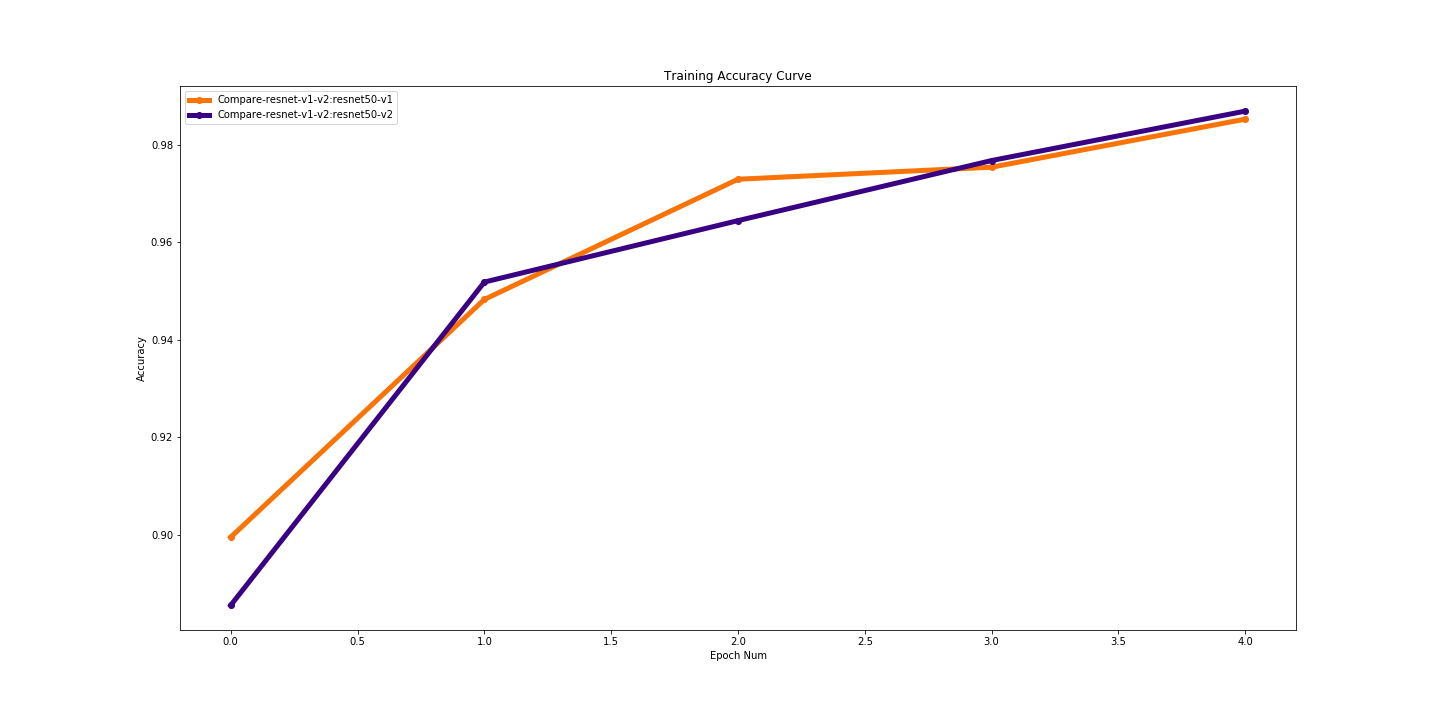

In [13]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-network-versions/train_accuracy.png") 

### Training Loss Curves

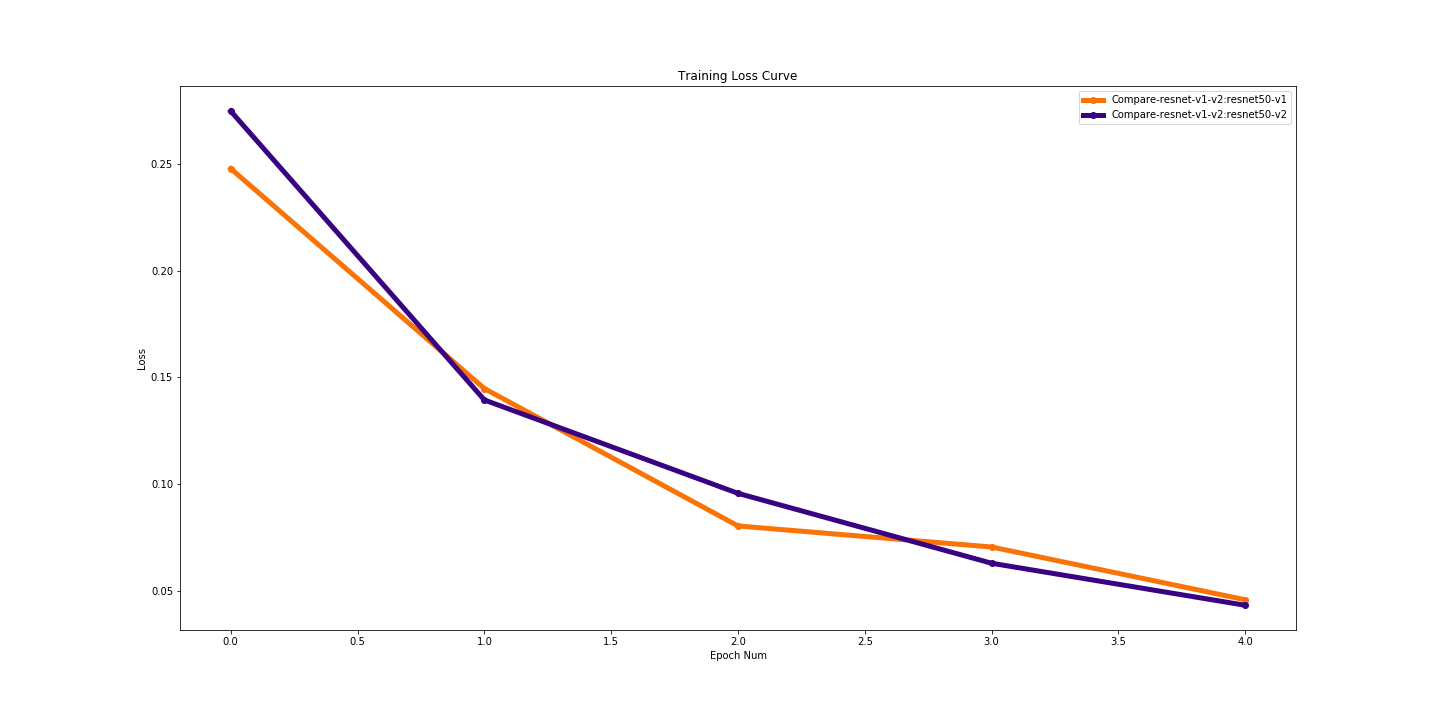

In [14]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-network-versions/train_loss.png") 

### Validation Accuracy Curves

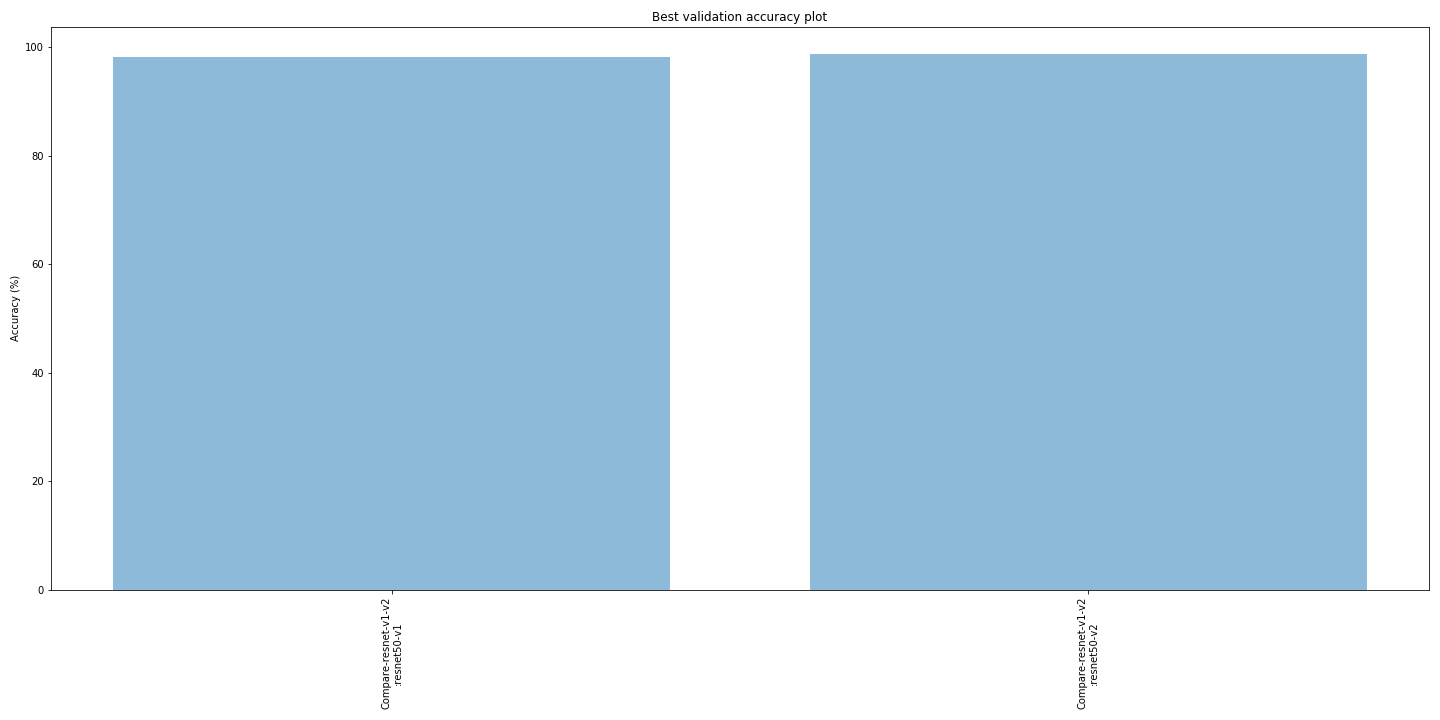

In [15]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-network-versions/stats_best_val_acc.png") 

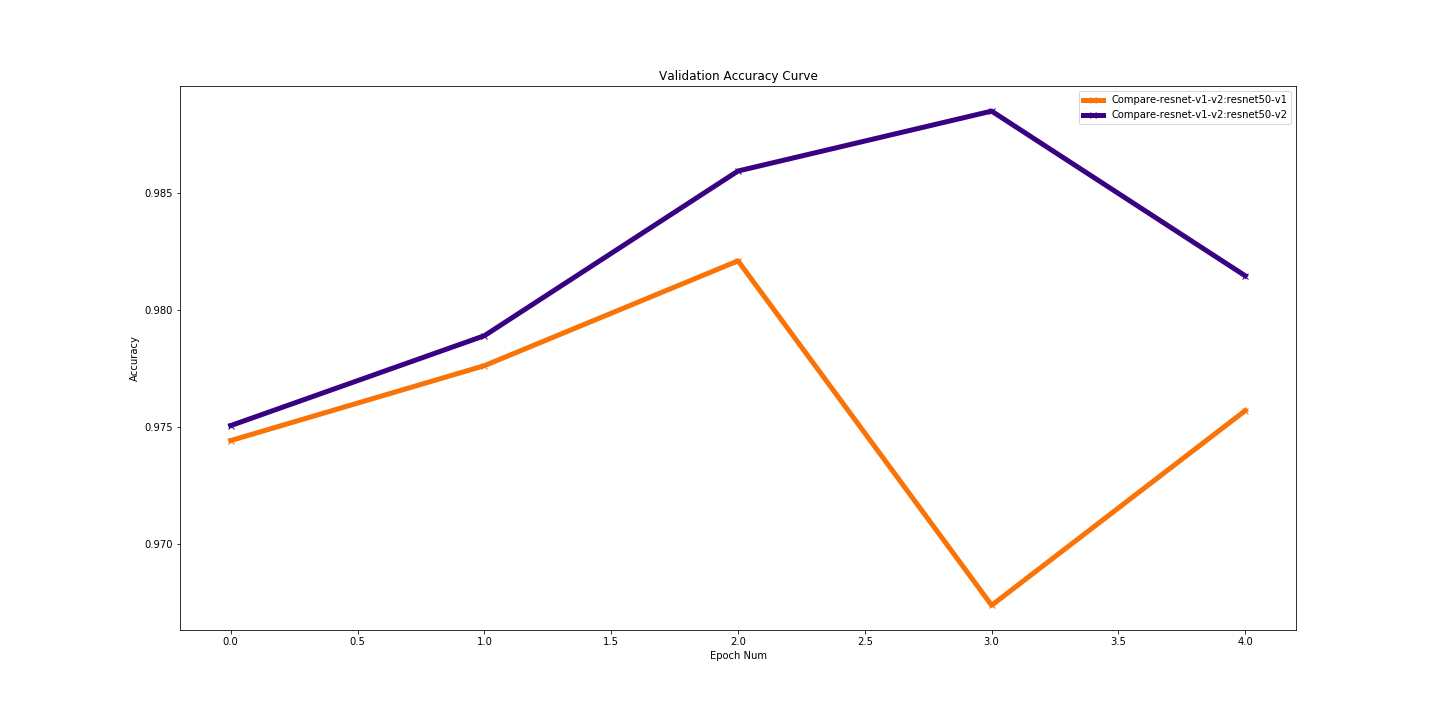

In [16]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-network-versions/val_accuracy.png") 

### Validation loss curves

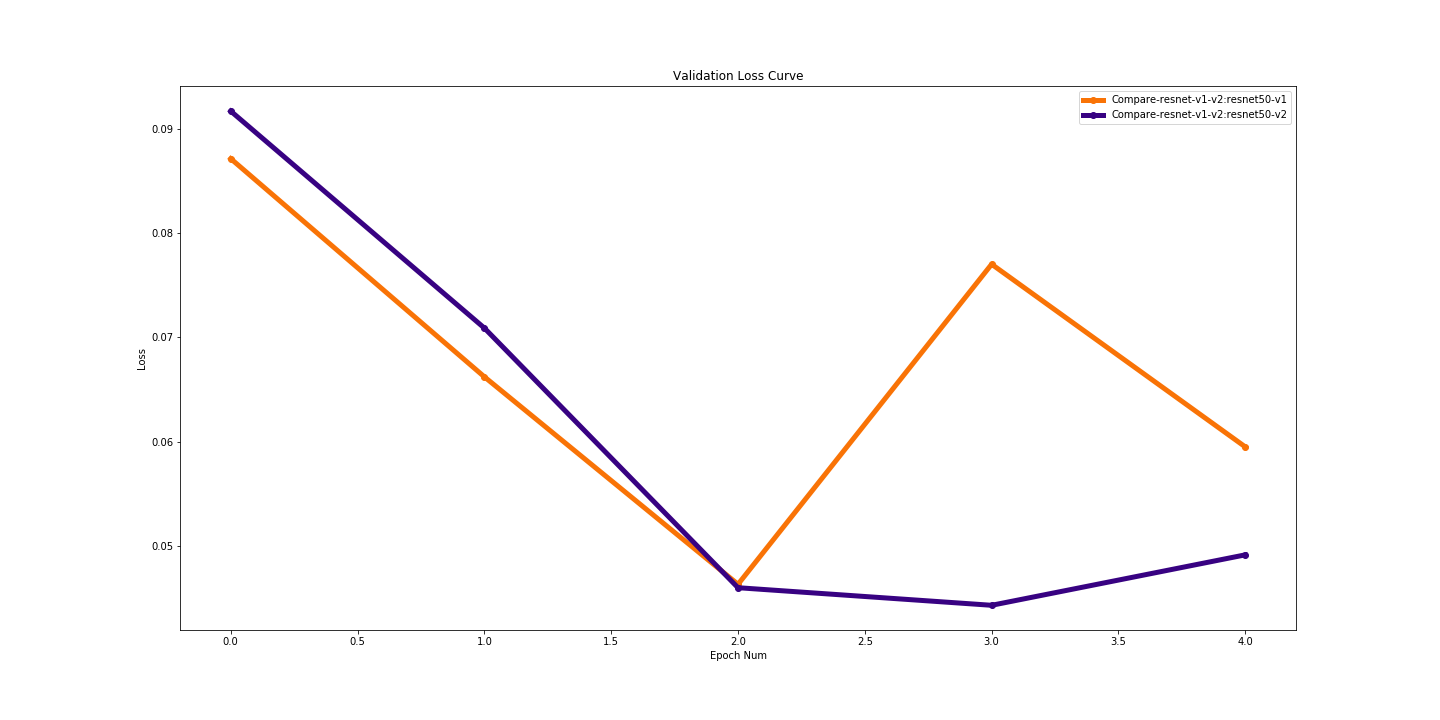

In [17]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-network-versions/val_loss.png") 

### Training Times and max gpu usages

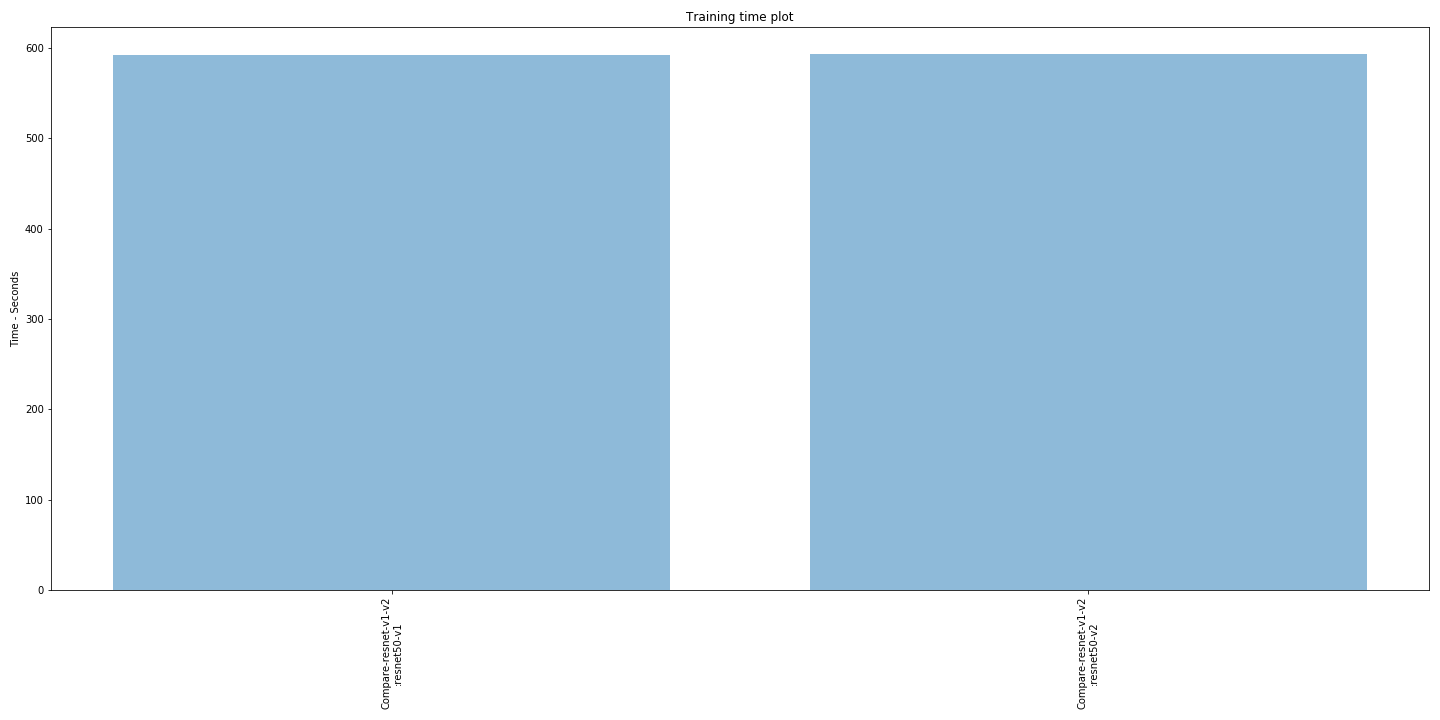

In [18]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-network-versions/stats_training_time.png") 

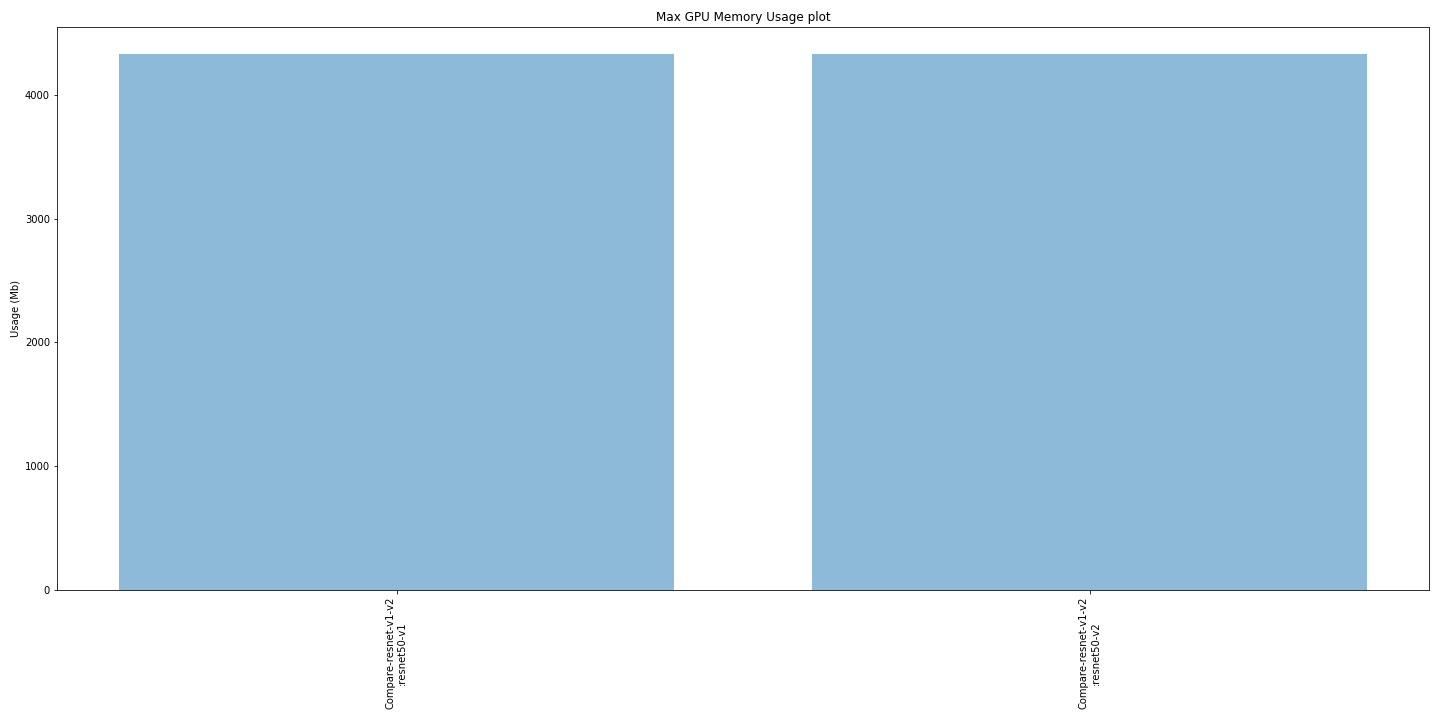

In [19]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-network-versions/stats_max_gpu_usage.png") 

# Goals



### Train a blood cell type classifier using resnet v1 and v2 variants

### Understand what all differences happen when switching between resnets variants 

### Understand bigger and deeper network not always means better results